In [1]:
#Importing Libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/demand.csv")


## DESCRIBING THE DATA

In [2]:
data.head(20)

,ID,Store ID,Total Price,Base Price,Units Sold
0,1,8091,99.0375,111.8625,20
1,2,8091,99.0375,99.0375,28
2,3,8091,133.9500,133.9500,19
3,4,8091,133.9500,133.9500,44
4,5,8091,141.0750,141.0750,52
5,9,8091,227.2875,227.2875,18
6,10,8091,327.0375,327.0375,47
7,13,8091,210.9000,210.9000,50
8,14,8091,190.2375,234.4125,82
9,17,8095,99.0375,99.0375,99


In [3]:
data.describe()

,ID,Store ID,Total Price,Base Price,Units Sold
count,150150.000000,150150.000000,150149.000000,150150.000000,150150.000000
mean,106271.555504,9199.422511,206.626751,219.425927,51.674206
std,61386.037861,615.591445,103.308516,110.961712,60.207904
min,1.000000,8023.000000,41.325000,61.275000,1.000000
25%,53111.250000,8562.000000,130.387500,133.237500,20.000000
50%,106226.500000,9371.000000,198.075000,205.912500,35.000000
75%,159452.750000,9731.000000,233.700000,234.412500,62.000000
max,212644.000000,9984.000000,562.162500,562.162500,2876.000000


In [4]:
data.columns

Index(['ID', 'Store ID', 'Total Price', 'Base Price', 'Units Sold'], dtype='object')

In [5]:
#Checking for Null Values
data.isnull().sum()

ID             0
Store ID       0
Total Price    1
Base Price     0
Units Sold     0
dtype: int64

In [6]:
data.nunique()

ID             150150
Store ID           76
Total Price       646
Base Price        572
Units Sold        708
dtype: int64

In [7]:
#Checking for Duplicated
data.duplicated().sum()

0

In [8]:
new_data1=data.dropna()

In [9]:
new_data1.isnull().sum()

ID             0
Store ID       0
Total Price    0
Base Price     0
Units Sold     0
dtype: int64

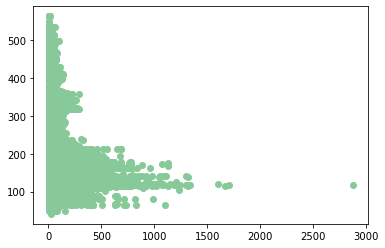

In [10]:
Plot_x = new_data1["Units Sold"]
Plot_y = new_data1["Total Price"]
plt.scatter(Plot_x,Plot_y,color="#88c999")
plt.show()

In [11]:
Stores_most_sales = new_data1["Store ID"].value_counts()

In [12]:
Stores_most_sales.head(10)

8094    3120
8991    2990
9823    2990
8023    2730
8438    2730
9279    2600
9872    2600
8317    2600
9613    2470
9532    2470
Name: Store ID, dtype: int64

In [13]:
Stores_most_sales.tail(10)

9442    1430
9132    1300
8555    1300
9578    1300
8319    1300
8091    1170
9439    1170
9178     780
9700     650
9001     260
Name: Store ID, dtype: int64

In [14]:
Stores_most_units_sold=new_data1.sort_values(('Units Sold'),ascending=False).groupby("Store ID").sum()

In [15]:
Stores_most_units_sold.head(40)

,ID,Total Price,Base Price,Units Sold
Store ID,,,,
8023,288189246,631894.1625,675365.2125,296478
8058,205894528,430840.9125,462270.7125,102858
8063,260678726,517973.2500,544052.1750,85746
8091,123393684,201559.1250,212135.4750,38383
8094,329197871,651351.8250,691364.4000,130484
8095,246838290,492960.9375,527624.0625,191277
8121,247190283,535525.6875,563344.5375,83045
8218,178558150,320652.0750,336703.9875,49388
8222,247129307,502028.2125,538930.7250,197509


In [16]:
Stores_most_units_sold['Units Sold'].head(30)

Store ID
8023    296478
8058    102858
8063     85746
8091     38383
8094    130484
8095    191277
8121     83045
8218     49388
8222    197509
8317    133981
8319     36413
8392     30968
8398    133792
8400     93206
8422     79210
8438    141000
8555     34766
8562    154002
8869    155714
8911     63385
8991    135071
9001      6053
9043     84515
9092     88014
9112    218127
9132     49681
9147    110791
9164    135959
9178     27572
9190    114448
Name: Units Sold, dtype: int64

In [17]:
Store_units_sold=Stores_most_units_sold.sort_values(['Units Sold'],ascending=False)

In [18]:
Store_units_sold.head(10)

,ID,Total Price,Base Price,Units Sold
Store ID,,,,
8023,288189246,631894.1625,675365.2125,296478
9845,236173276,466922.6250,500217.0375,261410
9823,319330809,662686.2750,709435.5375,233846
9112,248031708,508821.9000,546515.2875,218127
9613,263283327,530405.6625,569526.9000,205710
8222,247129307,502028.2125,538930.7250,197509
9611,263221079,573137.8500,613082.7375,196565
8095,246838290,492960.9375,527624.0625,191277
9250,248380013,493682.7000,526365.0750,168072


In [19]:
Store_units_sold.tail(10)

,ID,Total Price,Base Price,Units Sold
Store ID,,,,
9436,165754169,335514.8250,353946.4875,49174
9770,152631044,295128.9000,312171.1875,47958
8091,123393684,201559.1250,212135.4750,38383
9439,124387900,193522.8375,200815.9875,36431
8319,137413063,284614.5375,300807.5250,36413
8555,137573591,252594.0750,267333.5625,34766
8392,151179787,294655.0875,317698.0500,30968
9178,82743493,176471.2875,186244.6500,27572
9700,69323615,111972.2250,117567.4875,13154


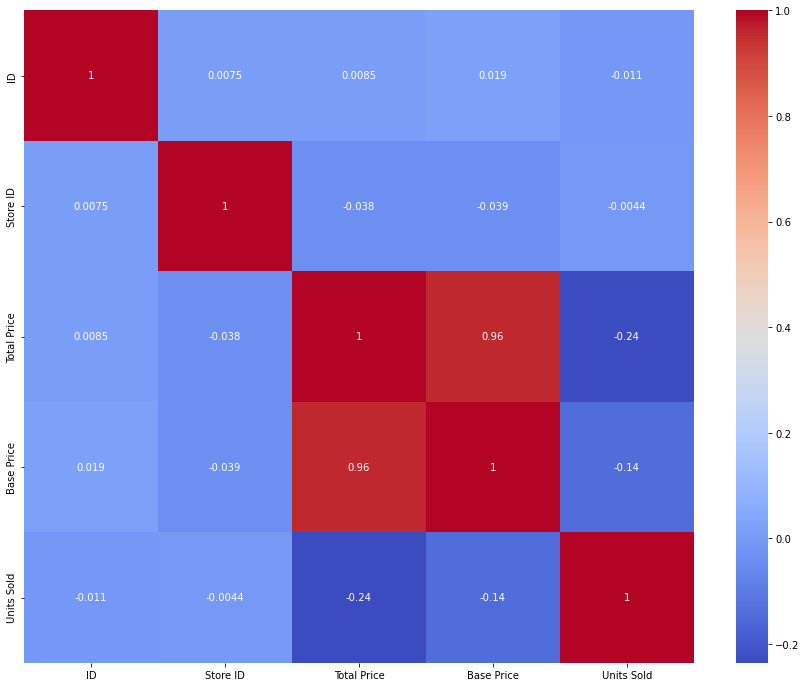

In [20]:
correlations = new_data1.corr(method='pearson')
plt.figure(figsize=(15, 12))
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

In [21]:
new_data=new_data1.drop(columns=["Base Price"])

In [22]:
new_data.head(10)

,ID,Store ID,Total Price,Units Sold
0,1,8091,99.0375,20
1,2,8091,99.0375,28
2,3,8091,133.9500,19
3,4,8091,133.9500,44
4,5,8091,141.0750,52
5,9,8091,227.2875,18
6,10,8091,327.0375,47
7,13,8091,210.9000,50
8,14,8091,190.2375,82
9,17,8095,99.0375,99


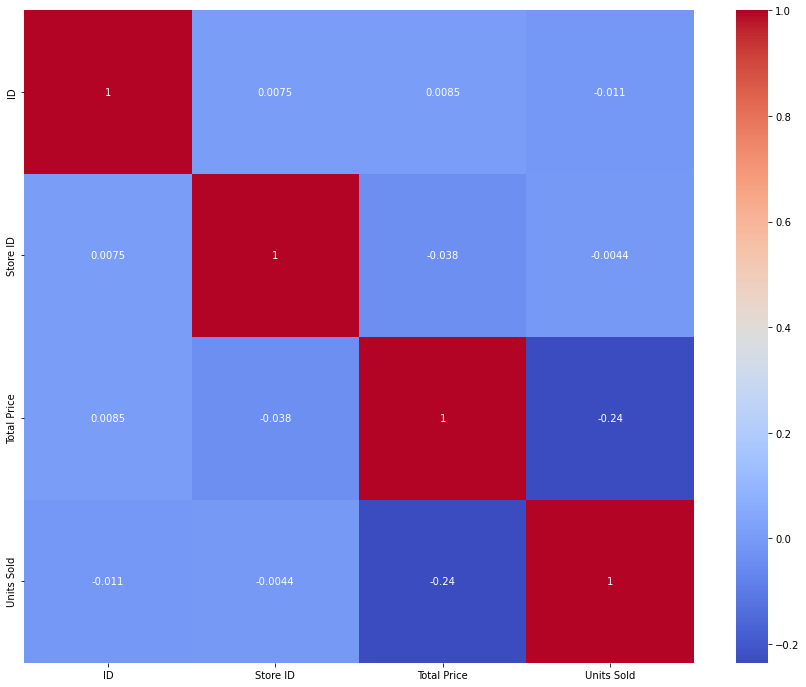

In [23]:
correlations = new_data.corr(method='pearson')
plt.figure(figsize=(15, 12))
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

# BUILDING THE MODEL 

## We will need to compare different models to see which one fits best.

In [24]:
X = new_data1[["Store ID","Total Price","Base Price"]]
Y = new_data1[["Units Sold"]]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

## DECISION TREE

In [26]:
model = DecisionTreeRegressor()
model.fit(X,Y)

DecisionTreeRegressor()

In [27]:
new_data1.head(15)

,ID,Store ID,Total Price,Base Price,Units Sold
0,1,8091,99.0375,111.8625,20
1,2,8091,99.0375,99.0375,28
2,3,8091,133.9500,133.9500,19
3,4,8091,133.9500,133.9500,44
4,5,8091,141.0750,141.0750,52
5,9,8091,227.2875,227.2875,18
6,10,8091,327.0375,327.0375,47
7,13,8091,210.9000,210.9000,50
8,14,8091,190.2375,234.4125,82
9,17,8095,99.0375,99.0375,99


In [28]:
X_test.head(15)

,Store ID,Total Price,Base Price
24864,9439,113.2875,134.6625
106034,9823,105.4500,105.4500
117630,9809,218.0250,218.0250
8816,9498,203.7750,203.7750
102906,8222,117.5625,133.2375
56969,9092,178.8375,212.3250
85025,9490,133.2375,133.2375
96035,8317,355.5375,469.5375
92811,9147,133.2375,133.2375
125360,9425,176.7000,176.7000


In [29]:
y_test.head(15)

,Units Sold
24864,21
106034,174
117630,37
8816,70
102906,100
56969,49
85025,11
96035,39
92811,60
125360,67


In [30]:
predictions = model.predict(X_test)
predictionsD=pd.DataFrame(predictions[0:15],columns=["Decision Tree"])
predictionsD.head(10)

,Decision Tree
0,21.000000
1,121.478261
2,37.428571
3,70.000000
4,91.833333
5,87.600000
6,26.916667
7,33.103448
8,49.162162
9,67.000000


## XGBOOST

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor

In [32]:
xgboost =XGBRegressor()
xgboost.fit(X,Y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [33]:
predictions2 = xgboost.predict(X_test)
predictionsXG = pd.DataFrame(predictions2[0:15],columns=["XGBoost"])
predictionsXG.head(10)

,XGBoost
0,28.051750
1,112.222137
2,54.841393
3,63.209644
4,95.747520
5,92.524300
6,22.453930
7,36.939140
8,44.496086
9,48.625851


In [38]:
ytestA = np.array(y_test)

In [41]:
ytestA[0:15]

array([[ 21],
       [174],
       [ 37],
       [ 70],
       [100],
       [ 49],
       [ 11],
       [ 39],
       [ 60],
       [ 67],
       [  5],
       [ 37],
       [162],
       [ 15],
       [ 74]], dtype=int64)

In [45]:
ytest2 = pd.DataFrame(ytestA[0:15],columns=["Ytest"])

In [47]:
df = pd.concat ([ytest2,predictionsD,predictionsXG],axis=1)
df

,Ytest,Decision Tree,XGBoost
0,21,21.000000,28.051750
1,174,121.478261,112.222137
2,37,37.428571,54.841393
3,70,70.000000,63.209644
4,100,91.833333,95.747520
5,49,87.600000,92.524300
6,11,26.916667,22.453930
7,39,33.103448,36.939140
8,60,49.162162,44.496086
9,67,67.000000,48.625851


### Judging from the two models used, it can be seen that Decision Tree performs better than Xgboost for our  prediction.